### Gradient Descent

Revised from: 
 

*   http://cs229.stanford.edu/
*   https://github.com/dtnewman/stochastic_gradient_descent





In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [ ]:
f = lambda x: x**3-2*x**2+2

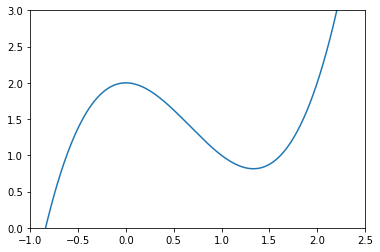

In [ ]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

In [ ]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3334253508453249
Number of steps: 17


The figures below show the route that was taken to find the local minimum.

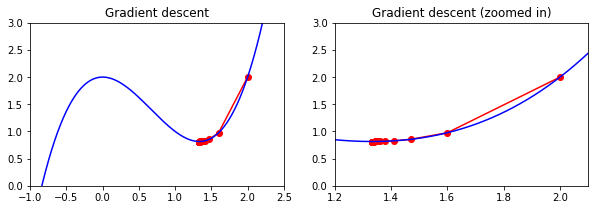

In [ ]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

You'll notice that the step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

A solution to this is to use adaptive step sizes as the algorithm below does (using scipy's fmin function to find optimal step sizes):

In [ ]:
# we setup this function to pass into the fmin algorithm
def f2(n,x,s):
    x = x + n*s
    return f(x)

x_old = 0
x_new = 2 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function to find ideal step size.
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print("Local minimum occurs at ", float(x_new))
print("Number of steps:", len(x_list))

Local minimum occurs at  1.3333333284505209
Number of steps: 4


With adaptive step sizes, the algorithm converges in just 4 iterations rather than 17. Of course, it takes time to compute the appropriate step size at each iteration. Here are some plots of the path taken below. You can see that it converges very quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

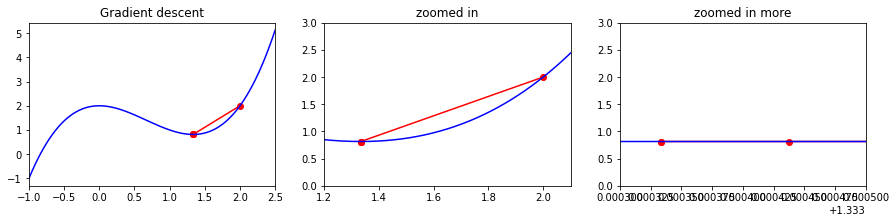

In [ ]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("zoomed in")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Another approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time:
$\eta(t+1) = \eta(t) / (1+t \times d)$.

In [ ]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.17 # step size
precision = 0.0001
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    n_k = n_k / (1 + t * d)
    t += 1

print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3308506740900838
Number of steps: 6


### Another examples ...


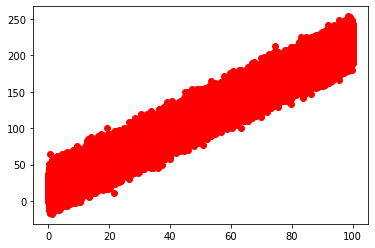

In [ ]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)
plt.scatter(x,y,c="r")
plt.show() 

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [ ]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [ ]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [ ]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 17.00052176219698
theta_1 = 2.016923984871931


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

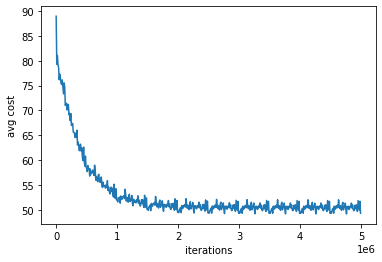

In [ ]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

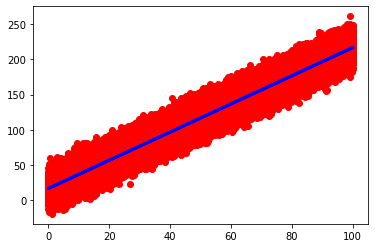

In [ ]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
hy = theta_new[0] + theta_new[1]*x 
plt.plot(x,hy,c="b", linewidth=3)
plt.scatter(x,y,c="r")
plt.show() 